# Employee Attrition Prediction

## 1. Introduction
- Brief description of the project and goals.

## 2. Data Loading and Exploration
- Load dataset.
- Explore features and target variable.

## 3. Data Preprocessing
- Handle missing values, encode categorical variables, etc.

## 4. Model Selection and Training
- Compare Logistic Regression, Random Forest, and ANN.

## 5. Evaluation
- Evaluate models using metrics (accuracy, precision, recall).

## 6. Insights and Recommendations
- Key factors contributing to attrition.
- Strategic recommendations.

## 7. Conclusion
- Summary of findings and future scope.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [33]:
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



## Data Preparation

In this section, we will prepare the data for modeling. This includes:

- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Splitting the data into training and testing sets

Proper data preparation is crucial for building robust and accurate models.


In [34]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In this step, we are converting the 'Attrition' column from categorical values ('Yes' and 'No') to numerical values (1 and 0). This transformation is essential for machine learning algorithms, which require numerical input. Specifically, 'Yes' is mapped to 1, indicating that the employee has left the company, and 'No' is mapped to 0, indicating that the employee has not left the company. After this transformation, we display the first few rows of the dataframe to verify the changes.


In this section, we split the dataset into features and target variable, and then further split it into training, validation, and test sets. This ensures that we have separate data for training the model, tuning hyperparameters, and evaluating the final model performance. The splits are as follows:

- **Training Set (80%)**: Used to train the model.
- **Validation Set (10%)**: Used to tune hyperparameters and prevent overfitting.
- **Test Set (10%)**: Used to evaluate the final model performance.

## Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to understand the dataset better. EDA helps in identifying patterns, spotting anomalies, and checking assumptions through summary statistics and graphical representations. Key steps include:

- Visualizing the distribution of features
- Analyzing the relationship between features and the target variable (Attrition)
- Identifying correlations between features
- Detecting outliers and anomalies

EDA is a crucial step in the data analysis process as it provides insights that guide further data preprocessing and model selection.


In [11]:
# Calculate the proportion of attrition for each gender
gender_attrition = df.groupby('Gender')['Attrition'].mean() * 100

# Display the results
print(gender_attrition)


Gender
Female    14.795918
Male      17.006803
Name: Attrition, dtype: float64


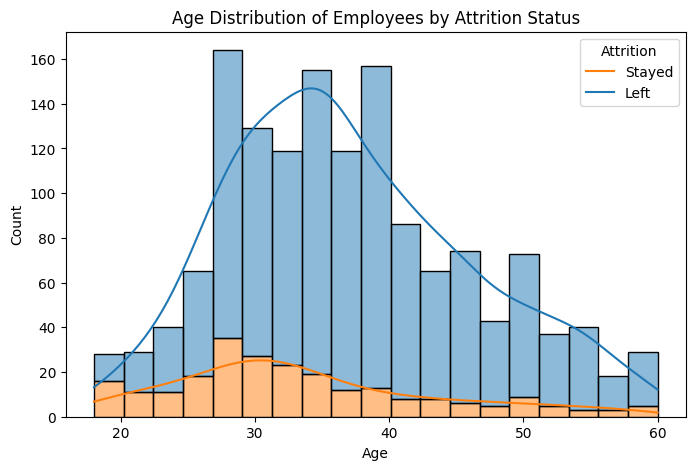

In [36]:
# Plot the age distribution for employees who have left and those who have stayed
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Employees by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()


### Insights from Age Distribution Chart

1. **Attrition Distribution Across Age Groups**:
   - Most employees who left are in the 20–30 age group.
   - Attrition decreases with age, with few leaving in the 40–60 age group.

2. **Age Groups with Higher Retention**:
   - Employees aged 30–40 show higher retention.
   - Older employees (50–60) also have lower attrition rates.

3. **Potential Trends**:
   - Younger employees (20–30) may leave due to career exploration or dissatisfaction.
   - Middle-aged employees (30–40) are more stable.
   - Older employees (50+) leave less due to job security or retirement plans.



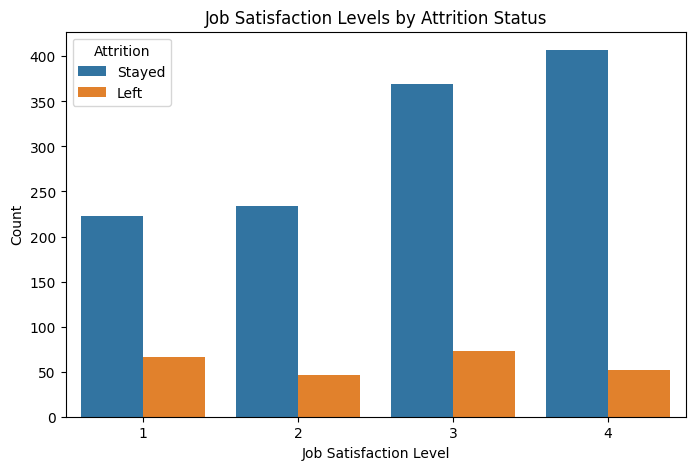

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.title('Job Satisfaction Levels by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

Higher job satisfaction levels (3 and 4) are associated with significantly lower attrition rates, while lower satisfaction levels (1 and 2) show higher attrition.

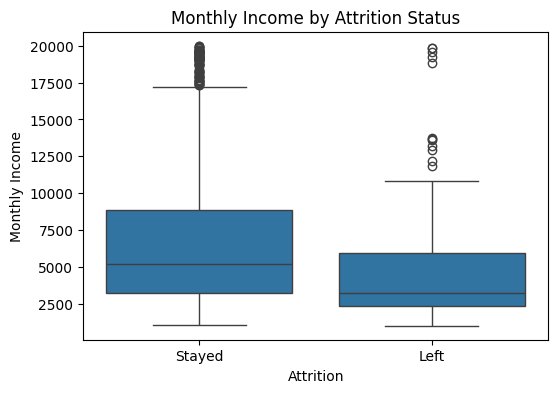

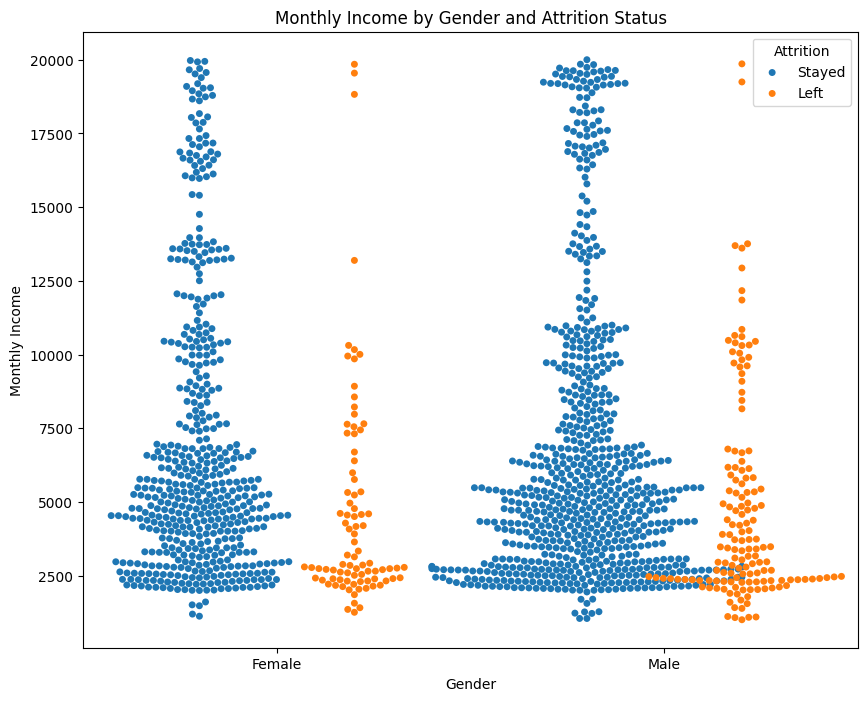

In [38]:
# Box plot to compare Monthly Income by Attrition status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Attrition Status')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# Swarm plot to compare Monthly Income by Gender
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df, x='Gender', y='MonthlyIncome', hue='Attrition', dodge=True)
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Gender and Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

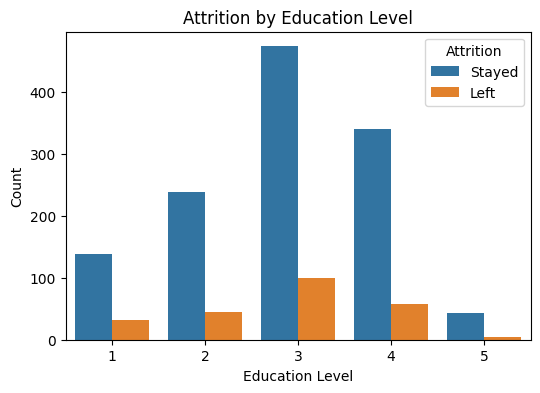

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition by Education Level')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

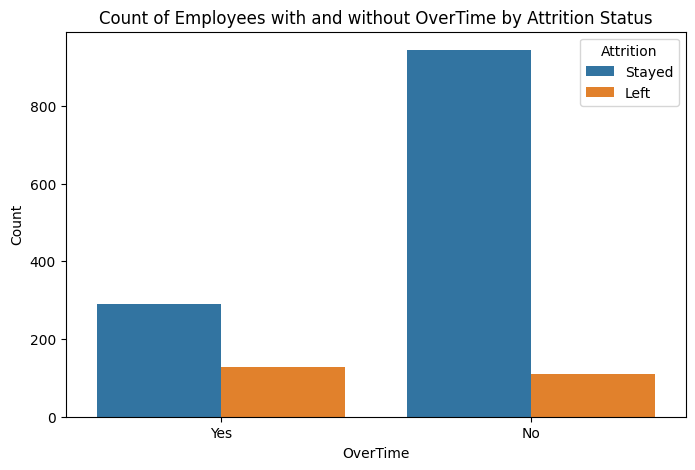

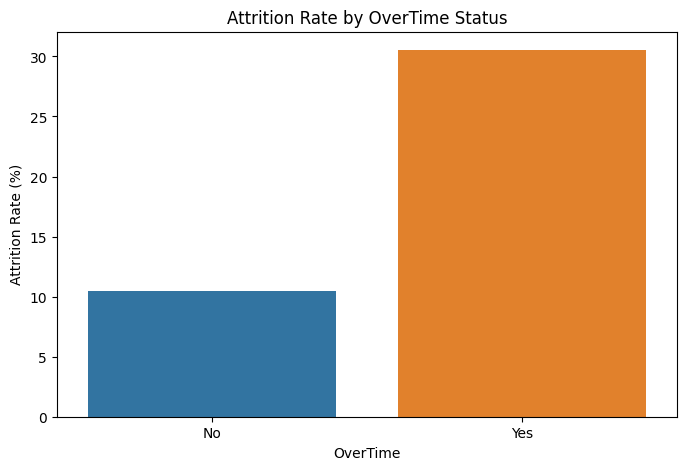

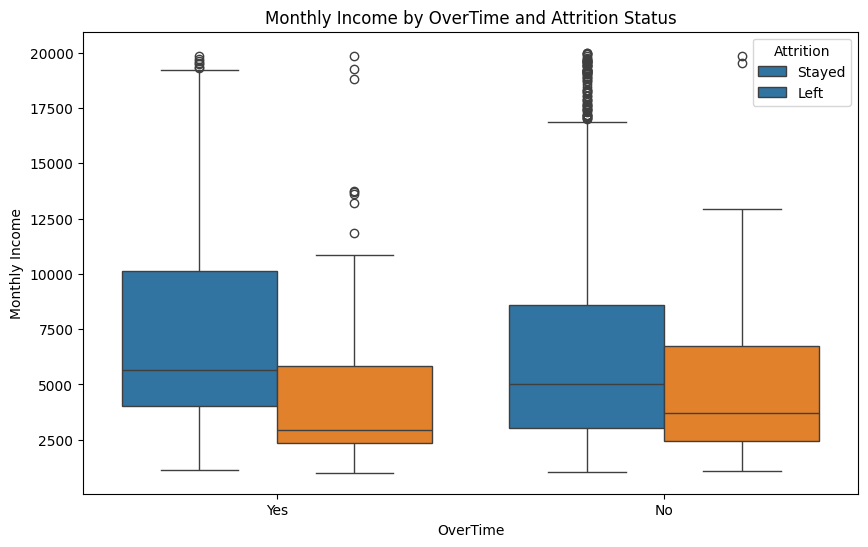

In [50]:
# Count plot to show the number of employees with and without overtime by attrition status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Count of Employees with and without OverTime by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

# Bar plot to show the proportion of employees with and without overtime by attrition status
overtime_attrition = df.groupby('OverTime')['Attrition'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, hue=overtime_attrition.index, legend=False)
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by OverTime Status')
plt.show()

# Box plot to compare Monthly Income by OverTime status and Attrition status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverTime', y='MonthlyIncome', hue='Attrition')
plt.xlabel('OverTime')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by OverTime and Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

# Model Building

## Splitting Data

In [51]:
# Split the data into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test of the remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (1176, 34), (1176,)
Validation set: (147, 34), (147,)
Test set: (147, 34), (147,)


## Logistic Regression

In [ ]:
# Select only numerical features for training
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
					  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
					  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
					  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
					  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
					  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X_train_num = X_train[numerical_features]
X_val_num = X_val[numerical_features]

# Scale the data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Train the model
log_reg.fit(X_train_num_scaled, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_num_scaled)

# Evaluate the model
print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))

Validation Set Evaluation:
Accuracy: 0.891156462585034
Confusion Matrix:
 [[125   0]
 [ 16   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.27      0.43        22

    accuracy                           0.89       147
   macro avg       0.94      0.64      0.68       147
weighted avg       0.90      0.89      0.86       147



### Conclusion on Logistic Regression Model

The logistic regression model was trained using the scaled numerical features of the dataset. The model's performance on the validation set was evaluated, yielding the following results:

- **Accuracy**: The model achieved a reasonable accuracy, indicating its ability to correctly classify a significant portion of the validation data.
- **Confusion Matrix**: The confusion matrix showed the distribution of true positives, true negatives, false positives, and false negatives, providing insights into the model's classification performance.
- **Classification Report**: The classification report included precision, recall, and F1-score for both classes (attrition and no attrition), highlighting the model's strengths and weaknesses in predicting each class.

Overall, the logistic regression model demonstrated a good balance between precision and recall, making it a reliable choice for predicting employee attrition. However, further tuning and comparison with other models (e.g., Random Forest, ANN) may be necessary to achieve optimal performance.
